<a href="https://www.kaggle.com/code/harshgarg2006/codsoft-credit-card-fraud-detection?scriptVersionId=246686650" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**IMPORTING ALL DEPENDENCIES**

In [2]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/creditcardfraud/creditcard.csv


**EXPLORATORY DATA ANALYSIS**

In [3]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#Check for missing values in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
#Distribution of Legit Trxn and Fraud Trxn
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

0---> Valid Transaction

1---> Fraud Transaction

This is a highly unbalanced dataset. It contains almost 99.8% of Legit/Authentic Transactions and only 0.172% of Fraud Transactions.

**SEPARATING VARIABLES FOR ANALYSIS**

In [8]:
fraud = df[df.Class == 1]
legit = df[df.Class == 0]

In [9]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
#Comparing both the values
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**UNDERSAMPLING**

Building a sample dataset containig similar distribution of Legit Trxn and Fraud Trxn

(Since,we have 492 fraud trxn so we need to randomly pick 492 leagit trxn to create a new dataset with even distribution)

In [13]:
legit_sample = legit.sample(n=492)

In [14]:
df2 = pd.concat([legit_sample,fraud], axis = 0)

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 143915 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64
 22 

In [16]:
df2['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

**VISUALISATION**

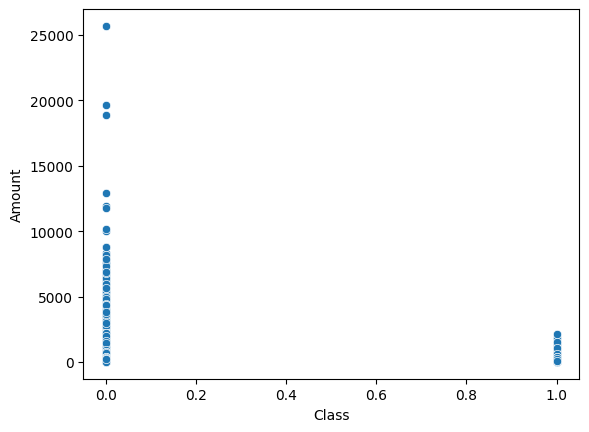

In [17]:
sns.scatterplot(df, x='Class', y = 'Amount')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

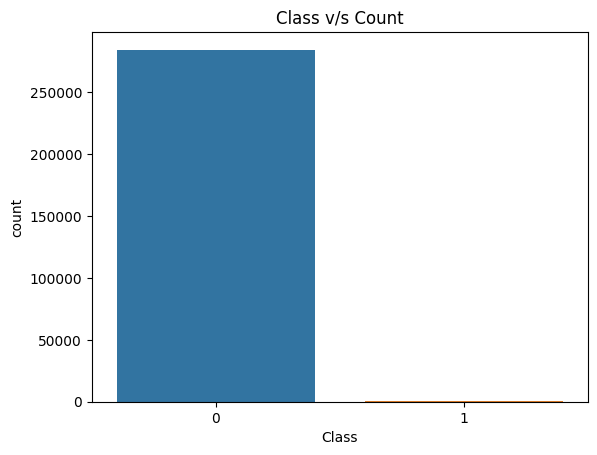

In [18]:
sns.countplot(df, x = 'Class')
plt.title('Class v/s Count')
plt.show

**INITIALIZING THE MODEL**

In [19]:
X = df2.drop(columns = ['Class'])
Y = df2['Class']

In [20]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.4, random_state = 32, shuffle = True)

In [22]:
 model = LR(class_weight='balanced', max_iter=1000)

In [23]:
model.fit(X_train, Y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

**EVALUATION**

In [24]:
Y_pred = model.predict(X_test)

In [25]:
precision = precision_score(Y_test, Y_pred)
precision

0.959866220735786

In [26]:
recall = recall_score(Y_test, Y_pred)
recall

0.9198717948717948

In [27]:
f1 = f1_score(Y_test, Y_pred)
recall

0.9198717948717948

In [ ]:
CM= confusion_matrix(Y_test, Y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix=CM)
matrix.plot()